<a href="https://colab.research.google.com/github/Usharbudha/Deep-Learning-SEM-3/blob/master/Assignment_3_(Cifar10_72_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras import models
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(10)
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [5]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.4800 - accuracy: 0.4599 - val_loss: 1.2070 - val_accuracy: 0.5641
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1105 - accuracy: 0.6090 - val_loss: 1.0317 - val_accuracy: 0.6362
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9480 - accuracy: 0.6672 - val_loss: 0.9881 - val_accuracy: 0.6486
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8480 - accuracy: 0.7021 - val_loss: 0.8852 - val_accuracy: 0.6923
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7706 - accuracy: 0.7295 - val_loss: 0.8652 - val_accuracy: 0.6981
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7078 - accuracy: 0.7536 - val_loss: 0.8691 - val_accuracy: 0.7042
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6516 - accuracy: 0.7696 - val_loss: 0.8832 -

313/313 - 4s - loss: 0.9045 - accuracy: 0.7200


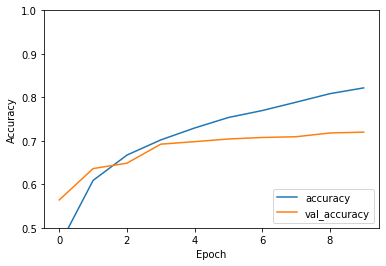

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)